In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [44]:
#1==>stroke
#0==>no stroke

In [4]:
#as can be seen there is some null values

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:

m1=df['bmi'].mean()
df['bmi'].fillna(m1,inplace=True)

In [9]:
#fill null values by taking its mean

In [10]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

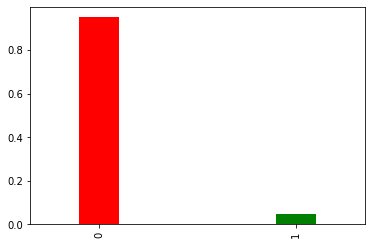

In [11]:
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))
plt.show()#visualization

In [12]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()#To check outliers

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


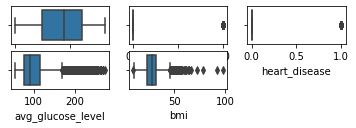

In [13]:
n=1
for column in cols:
    if n<=15:
        ax = plt.subplot(5,3,n)
        sns.boxplot(cols[column])
        
    n=n+1    
       

In [14]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

# visualization

<AxesSubplot:xlabel='gender', ylabel='count'>

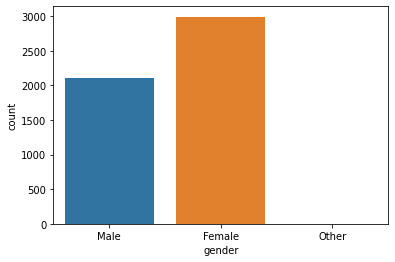

In [15]:


sns.countplot(df['gender'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

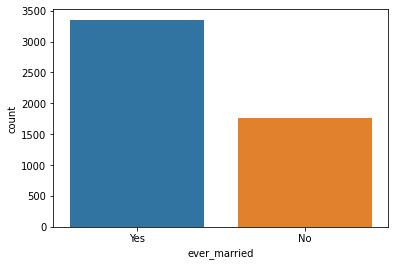

In [16]:
sns.countplot(df['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

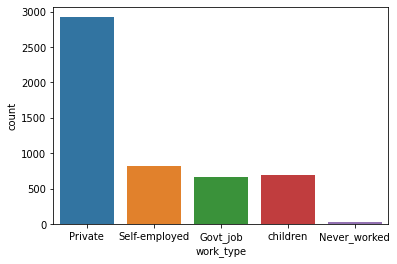

In [17]:
sns.countplot(df['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

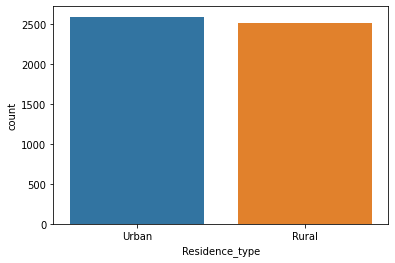

In [18]:
sns.countplot(df['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

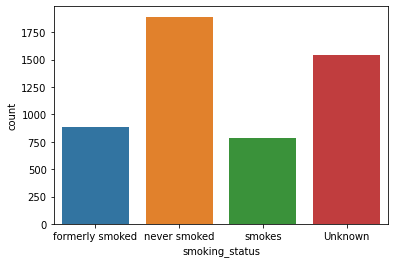

In [19]:
sns.countplot(df['smoking_status'])

In [20]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [21]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [22]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(['int64','float64'])#separate categorcal data and numric data

In [23]:
df_cat
from sklearn.preprocessing import LabelEncoder
Lr=LabelEncoder()
for i in df_cat:
    df_cat[i]=Lr.fit_transform(df_cat[i])  # convert object data into int,float

In [24]:
df1 = pd.concat([df_cat,df_num],axis=1) #concat two dataframes

In [25]:
df1

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.600000,1
1,0,1,3,0,2,51676,61.0,0,0,202.21,28.893237,1
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.500000,1
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.400000,1
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,1,2,18234,80.0,1,0,83.75,28.893237,0
5106,0,1,3,1,2,44873,81.0,0,0,125.20,40.000000,0
5107,0,1,3,0,2,19723,35.0,0,0,82.99,30.600000,0
5108,1,1,2,0,1,37544,51.0,0,0,166.29,25.600000,0


In [26]:
df1.drop('id',axis=1,inplace=True)

In [27]:
df1

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,228.69,36.600000,1
1,0,1,3,0,2,61.0,0,0,202.21,28.893237,1
2,1,1,2,0,2,80.0,0,1,105.92,32.500000,1
3,0,1,2,1,3,49.0,0,0,171.23,34.400000,1
4,0,1,3,0,2,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,1,2,80.0,1,0,83.75,28.893237,0
5106,0,1,3,1,2,81.0,0,0,125.20,40.000000,0
5107,0,1,3,0,2,35.0,0,0,82.99,30.600000,0
5108,1,1,2,0,1,51.0,0,0,166.29,25.600000,0


In [28]:
x = df1.iloc[:,:-1]
y=df1['stroke']  # create x & y 

In [29]:
x

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,1,67.0,0,1,228.69,36.600000
1,0,1,3,0,2,61.0,0,0,202.21,28.893237
2,1,1,2,0,2,80.0,0,1,105.92,32.500000
3,0,1,2,1,3,49.0,0,0,171.23,34.400000
4,0,1,3,0,2,79.0,1,0,174.12,24.000000
...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,1,2,80.0,1,0,83.75,28.893237
5106,0,1,3,1,2,81.0,0,0,125.20,40.000000
5107,0,1,3,0,2,35.0,0,0,82.99,30.600000
5108,1,1,2,0,1,51.0,0,0,166.29,25.600000


In [30]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest, ypred)) # build a function 

In [32]:
lg = LogisticRegression()
knn = KNeighborsClassifier()
svm=SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier() # classification models

# Acuuracy

In [33]:
mymodel(lg)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



In [34]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.92      1533



In [35]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [36]:
mymodel(dt)


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1450
           1       0.13      0.11      0.12        83

    accuracy                           0.91      1533
   macro avg       0.54      0.53      0.54      1533
weighted avg       0.90      0.91      0.91      1533



In [37]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



# Apply hypertuner

In [38]:
dt1 = DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1450
           1       0.13      0.08      0.10        83

    accuracy                           0.92      1533
   macro avg       0.54      0.53      0.53      1533
weighted avg       0.90      0.92      0.91      1533



In [39]:
for i in range(1,50):
    dt2 = DecisionTreeClassifier(criterion ='entropy',max_depth=i)
    dt2.fit(xtrain, ytrain)
    ypred = dt2.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.9458577951728636
 2 -: 0.9458577951728636
 3 -: 0.9458577951728636
 4 -: 0.943900848010437
 5 -: 0.9425962165688193
 6 -: 0.9373776908023483
 7 -: 0.9302022178734507
 8 -: 0.9354207436399217
 9 -: 0.9321591650358774
 10 -: 0.9302022178734507
 11 -: 0.928897586431833
 12 -: 0.9275929549902152
 13 -: 0.9223744292237442
 14 -: 0.9093281148075668
 15 -: 0.9151989562948467
 16 -: 0.9145466405740378
 17 -: 0.9119373776908023
 18 -: 0.908675799086758
 19 -: 0.9119373776908023
 20 -: 0.9093281148075668
 21 -: 0.908675799086758
 22 -: 0.9067188519243313
 23 -: 0.9119373776908023
 24 -: 0.9125896934116112
 25 -: 0.9125896934116112
 26 -: 0.908675799086758
 27 -: 0.9067188519243313
 28 -: 0.9073711676451403
 29 -: 0.91324200913242
 30 -: 0.9093281148075668
 31 -: 0.9112850619699935
 32 -: 0.9073711676451403
 33 -: 0.9047619047619048
 34 -: 0.9093281148075668
 35 -: 0.9119373776908023
 36 -: 0.9125896934116112
 37 -: 0.9106327462491846
 38 -: 0.9112850619699935
 39 -: 0.9119373776908023
 4

In [40]:
dt3 = DecisionTreeClassifier(criterion ='entropy' ,max_depth=2)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [41]:
dt4= DecisionTreeClassifier(criterion = 'gini' ,min_samples_leaf=16)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.25      0.01      0.02        83

    accuracy                           0.94      1533
   macro avg       0.60      0.50      0.50      1533
weighted avg       0.91      0.94      0.92      1533



In [42]:
cvs = cross_val_score(dt3, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) 

0.9512720156555773


In [43]:
cvs = cross_val_score(dt4, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) 

0.9499021526418787
